Libraries

# Colab load

In [1]:
from google.colab import drive
drive.mount('/content/drive')


import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Glos')
folder = os.path.join('/content/drive/My Drive/Colab Notebooks/Glos')
!ls

Mounted at /content/drive
breast-cancer.data    diabetes.csv  heartdata.csv  Social_Network_Ads.csv
classification.ipynb  heart.csv     Seed_Data.csv  SVMDTr.ipynb


# old lab

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")

Read Data

In [ ]:
df = pd.read_csv('Seed_Data.csv')
print(f"Shape of dataset: {df.shape}")
df.head()

Shape of dataset: (210, 8)


,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [ ]:
from sklearn.preprocessing import QuantileTransformer
x=df
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['A', 'P','C','LK','WK','A_Coef','LKG','target']
df_new.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (210). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  "X does not have valid feature names, but"


,A,P,C,LK,WK,A_Coef,LKG,target
0,0.595694,0.612440,0.449761,0.650718,0.557416,0.181818,0.485646,0.0
1,0.559809,0.559809,0.624402,0.521531,0.571770,0.014354,0.126794,0.0
2,0.488038,0.444976,0.947368,0.277512,0.578947,0.267943,0.074163,0.0
3,0.430622,0.411483,0.837321,0.306220,0.598086,0.205742,0.062201,0.0
4,0.669856,0.655502,0.937799,0.576555,0.751196,0.033493,0.413876,0.0


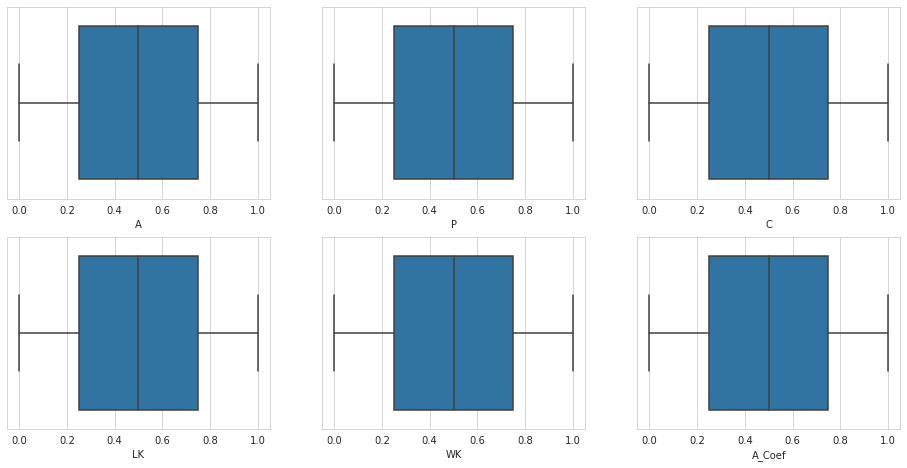

In [ ]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['A'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['P'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['C'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['LK'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['WK'],data=df_new)
plt.subplot(3,3,6)
sns.boxplot(x=df_new['A_Coef'],data=df_new)

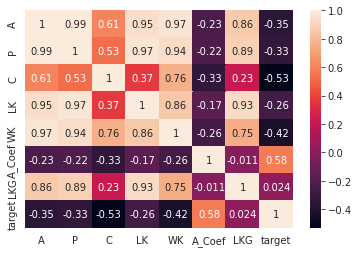

In [ ]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

In [ ]:
#dff= df_selected=df.drop(['BloodPressure','SkinThickness','Insulin'],axis='columns')

In [ ]:
# yy= dff['Outcome']
# xx=dff.drop('Outcome',axis=1)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test= train_test_split(xx,yy,test_size=0.2,random_state=0)

In [ ]:
features = df.drop('target',axis=1)
target = df['target']

In [ ]:
traindata = np.column_stack((features, target))


K Means

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(features)
cluster_labels = kmeans.fit_predict(features)

kmeans.cluster_centers_

y_km = kmeans.fit_predict(features)
y_km

array([2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 1, 2, 3, 1, 3, 3,
       2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 1, 3, 3, 3, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=2, random_state=0).fit(traindata)

# Logistic regression

Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('heartdata.csv')
print(f"Shape of dataset: {dataset.shape}")
dataset.head()

Shape of dataset: (4238, 15)


,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
dataset.isnull().sum()

sex                  0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
dataset['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [ ]:
#Percentage of missing records in the glucose column
print('Percent of missing records in the glucose column: %.2f%%' %((dataset['glucose'].isnull().sum()/dataset.shape[0])*100))

Percent of missing records in the glucose column: 9.16%


In [ ]:
print('Mean of cigsPerDay column: %.2f' % (dataset["cigsPerDay"].mean(skipna = True)))

Mean of cigsPerDay column: 9.00


In [ ]:
dataset["cigsPerDay"].fillna(dataset["cigsPerDay"].mean(skipna=True), inplace=True)

In [ ]:
dataset.isnull().sum()

sex                  0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
dataset["BPMeds"].fillna(dataset['BPMeds'].value_counts().idxmax(), inplace=True)

In [ ]:
dataset.isnull().sum()

sex                  0
age                  0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
dataset["totChol"].fillna(dataset["totChol"].mean(skipna=True), inplace=True)

In [ ]:
dataset["BMI"].fillna(dataset["BMI"].mean(skipna=True), inplace=True)

In [ ]:
dataset["heartRate"].fillna(dataset["heartRate"].mean(skipna=True), inplace=True)

In [ ]:
dataset["glucose"].fillna(dataset["glucose"].mean(skipna=True), inplace=True)

In [ ]:
dataset.isnull().sum()

sex                0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
X = dataset.drop('TenYearCHD', 1)
y = dataset.TenYearCHD

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred})
a.head()

,Actual value,Predicted value
3159,0,0
466,0,0
1987,0,0
473,0,0
2084,0,0


              precision    recall  f1-score   support

           0       0.84      0.99      0.91       707
           1       0.43      0.02      0.04       141

    accuracy                           0.83       848
   macro avg       0.63      0.51      0.47       848
weighted avg       0.77      0.83      0.76       848



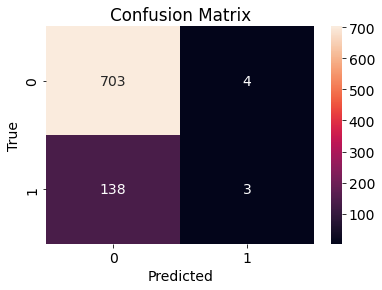

In [ ]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()

In [ ]:
df=pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],columns= iris_data['feature_names'] + ['target'])

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df['target'].unique()

array([0., 1., 2.])

# Naive Bayes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [10]:
netaddataset = pd.read_csv('Social_Network_Ads.csv')
netaddataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
netaddataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
X = netaddataset.iloc[:, [1, 2, 3]].values
y = netaddataset.iloc[:, -1].values

In [11]:
from sklearn.preprocessing import LabelEncoder
labelenc = LabelEncoder()
X[:,0] = labelenc.fit_transform(X[:,0])
X

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [15]:
y_pred  =  classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



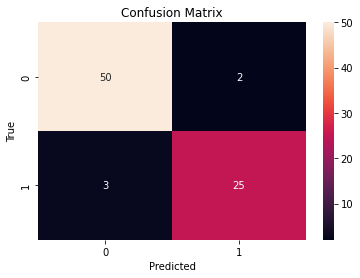

In [17]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))